In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-17.202995899644662 -18.49175535786381
30.24808990694939 179.96319848466567
-35.58154278162353 -18.848392184553518
71.31133070289167 140.42149260017328
82.6278532824306 113.1543610906931
80.75954966376352 -86.12025541111298
20.739943625089936 -127.56617859113965
-50.510426288752384 -49.96776759165385
-26.12998869470556 8.996253905748205
41.24751499287342 -178.38051344638714
29.351553302844977 -47.19430766682544
75.77341783223994 1.293817005850002
-57.88460790376576 -5.032244009003591
-67.15288061145785 44.63681328980485
43.41431882626452 176.37615451267112
77.82384984119523 -19.310697701156585
-58.90396305460833 -167.632487979727
-46.307891920500005 -49.915882993634426
86.17737302101017 123.3259861868122
39.18595343380133 -156.531580434883
-70.94613319177678 -57.574161950418755
-4.117657790792293 -11.274920911971918
-60.98479109882828 155.0741555311218
-53.82594683448937 83.54657128650621
-3.1802166191551464 160.12091954385227
-89.9531533915095 54.35654068387956
29.55820108389956 133.0

-49.471567732570506 27.07394502938442
87.08785701813025 18.004229724716282
54.93062020914488 145.2687239872543
40.49348859167878 1.084037098180005
17.647840305178207 42.4179411912703
-10.759932047055955 -148.62039045100883
-86.65076956938825 -26.48945151743135
80.85500337685266 76.45895763820562
44.478438829469525 -177.9183268664528
-60.35248606842926 136.61891131788752
-89.80595689464646 -110.27144455597426
25.963060733629135 -35.513085171384375
-86.54818852063069 -163.41677436486924
-5.274836021439569 -78.18854638858093
7.342400361991778 30.313138443293525
82.41481290912057 165.4553736447893
-40.392216412514756 -85.60874260859626
83.1795194000241 -88.39058900147856
-68.71478144159181 -174.26052685853855
68.148831008451 -99.02259978631577
-21.168317003216544 158.9769950667735
16.718023614641254 142.7439376066099
-2.8010304789603424 -96.56895246754193
-79.20650642533842 79.18212091551362
-3.1870945572071747 92.80005874286007
-41.50665761502503 10.568544169882841
68.92265165548758 -81.3

36.2188817181888 -134.2389591435459
8.314445148814826 -26.525765485717073
13.937388675683636 110.28797541984983
66.60379033012381 -26.278958569945274
26.14638009120401 -49.9907367383837
40.317564489775975 -111.89314803977602
64.04531978258507 -157.36338131762994
70.71597929911948 -47.709540179701776
-61.461958400602505 -141.68089436874186
-12.082266384013522 -78.2502757700245
-57.72847451260956 -151.18325888760234
-34.948965817040396 -74.07479923807102
-51.144691380073155 92.101736944717
70.08203052514958 -146.24151947149264
8.694588244040347 117.81701535937617
-35.79518771628922 3.850338576432506
77.60223726006029 -49.69973083957382
-8.796886948162182 176.77768440908687
-57.27568881457166 -101.27435318252742
-8.294178746858393 137.34001536122742
29.758608945882784 140.19596145664917
-37.54252730061909 75.34778906966153
37.00962112703233 30.155279963741805
-2.7807210384873855 -39.413433487478045
2.2879243423578686 -94.03733224000153
-11.962839556075522 124.68130590408452
88.09982580127

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=927ddbb91d7c9ceb8c46b23dd67d183f


In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

577

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | deputatskiy
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | san quintin
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | tuatapere
P

Processing Record 37 of Set 4 | tefe
Processing Record 38 of Set 4 | america dourada
Processing Record 39 of Set 4 | saint anthony
Processing Record 40 of Set 4 | chardara
Processing Record 41 of Set 4 | jijiga
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | kuytun
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | kloulklubed
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | roebourne
Processing Record 49 of Set 4 | bredy
Processing Record 50 of Set 4 | one hundred mile house
City not found. Skipping...
Processing Record 1 of Set 5 | bakchar
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | tautira
Processing Record 4 of Set 5 | cururupu
Processing Record 5 of Set 5 | mnogovershinnyy
Processing Record 6 of Set 5 | sabha
Processing Record 7 of Set 5 | ziniare
Processing Record 8 of Set 5 | mandera
Processing Record 9 of Set 5 | srednekolymsk
Processing Re

Processing Record 28 of Set 8 | liepaja
Processing Record 29 of Set 8 | hambantota
Processing Record 30 of Set 8 | barcelona
Processing Record 31 of Set 8 | severnyy
Processing Record 32 of Set 8 | klaksvik
Processing Record 33 of Set 8 | nouadhibou
Processing Record 34 of Set 8 | kota
Processing Record 35 of Set 8 | aklavik
Processing Record 36 of Set 8 | rosetta
Processing Record 37 of Set 8 | makakilo city
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | barmer
Processing Record 40 of Set 8 | antofagasta
Processing Record 41 of Set 8 | nador
Processing Record 42 of Set 8 | carnarvon
Processing Record 43 of Set 8 | chingirlau
Processing Record 44 of Set 8 | port blair
Processing Record 45 of Set 8 | calama
Processing Record 46 of Set 8 | salym
Processing Record 47 of Set 8 | kamina
Processing Record 48 of Set 8 | kiruna
Processing Record 49 of Set 8 | karla
Processing Record 50 of Set 8 | kyzyl-mazhalyk
Processing Record 1 of Set 9 | new philadelphia
Processing 

Processing Record 18 of Set 12 | sioux lookout
Processing Record 19 of Set 12 | ondo
Processing Record 20 of Set 12 | saint-michel-des-saints
Processing Record 21 of Set 12 | mehamn
Processing Record 22 of Set 12 | along
Processing Record 23 of Set 12 | russkiy kameshkir
Processing Record 24 of Set 12 | sangar
Processing Record 25 of Set 12 | sterling
Processing Record 26 of Set 12 | nieuw nickerie
Processing Record 27 of Set 12 | charagua
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,81.95,93,40,1.14,MY,2022-06-01 17:44:46
1,Butaritari,3.0707,172.7902,80.69,79,100,9.26,KI,2022-06-01 17:44:46
2,Jamestown,42.0970,-79.2353,83.05,59,40,12.66,US,2022-06-01 17:44:47
3,Deputatskiy,69.3000,139.9000,33.24,94,100,5.08,RU,2022-06-01 17:44:47
4,Saskylakh,71.9167,114.0833,31.01,91,100,14.52,RU,2022-06-01 17:44:48
5,Qaanaaq,77.4840,-69.3632,28.15,62,47,6.93,GL,2022-06-01 17:44:48
6,San Quintin,30.4833,-115.9500,67.77,61,28,10.13,MX,2022-06-01 17:44:49
7,Mar Del Plata,-38.0023,-57.5575,53.62,73,40,14.97,AR,2022-06-01 17:44:49
8,Luderitz,-26.6481,15.1594,66.40,33,0,10.40,NA,2022-06-01 17:44:50
9,Provideniya,64.3833,-173.3000,42.12,81,62,2.64,RU,2022-06-01 17:44:50


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-06-01 17:44:46,5.4112,100.3354,81.95,93,40,1.14
1,Butaritari,KI,2022-06-01 17:44:46,3.0707,172.7902,80.69,79,100,9.26
2,Jamestown,US,2022-06-01 17:44:47,42.0970,-79.2353,83.05,59,40,12.66
3,Deputatskiy,RU,2022-06-01 17:44:47,69.3000,139.9000,33.24,94,100,5.08
4,Saskylakh,RU,2022-06-01 17:44:48,71.9167,114.0833,31.01,91,100,14.52
5,Qaanaaq,GL,2022-06-01 17:44:48,77.4840,-69.3632,28.15,62,47,6.93
6,San Quintin,MX,2022-06-01 17:44:49,30.4833,-115.9500,67.77,61,28,10.13
7,Mar Del Plata,AR,2022-06-01 17:44:49,-38.0023,-57.5575,53.62,73,40,14.97
8,Luderitz,NA,2022-06-01 17:44:50,-26.6481,15.1594,66.40,33,0,10.40
9,Provideniya,RU,2022-06-01 17:44:50,64.3833,-173.3000,42.12,81,62,2.64


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1654106948.1077352

In [19]:
today = time.strftime("%x")
today

'06/01/22'

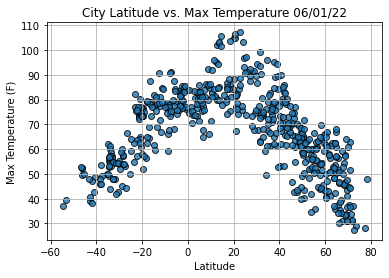

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

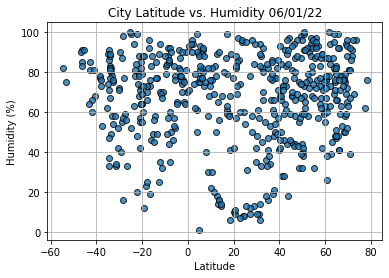

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

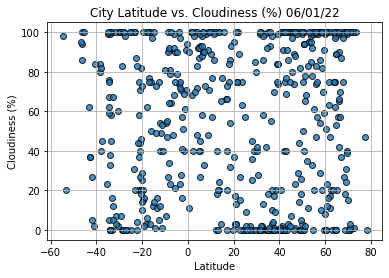

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

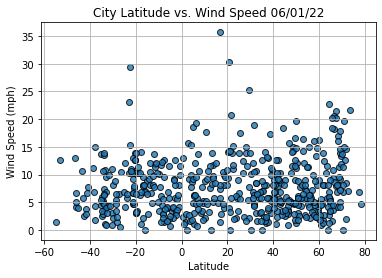

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                   Nikolskoye
Country                        RU
Date          2022-06-01 17:44:52
Lat                       59.7035
Lng                       30.7861
Max Temp                    66.09
Humidity                       63
Cloudiness                     99
Wind Speed                   4.83
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-06-01 17:44:46,5.4112,100.3354,81.95,93,40,1.14
1,Butaritari,KI,2022-06-01 17:44:46,3.0707,172.7902,80.69,79,100,9.26
2,Jamestown,US,2022-06-01 17:44:47,42.0970,-79.2353,83.05,59,40,12.66
3,Deputatskiy,RU,2022-06-01 17:44:47,69.3000,139.9000,33.24,94,100,5.08
4,Saskylakh,RU,2022-06-01 17:44:48,71.9167,114.0833,31.01,91,100,14.52


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [33]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
529     True
530     True
531     True
532     True
533    False
Name: Lat, Length: 534, dtype: bool

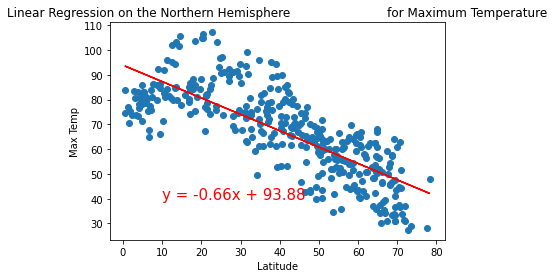

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

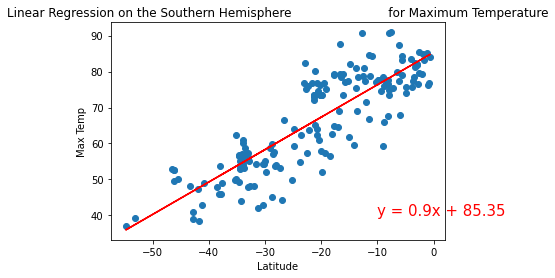

In [36]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-10,40))

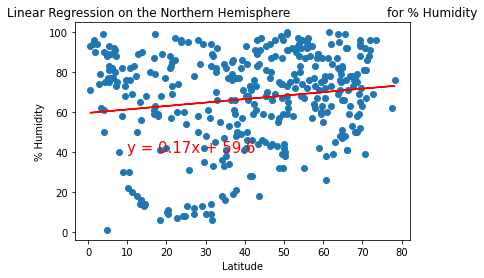

In [38]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,40))

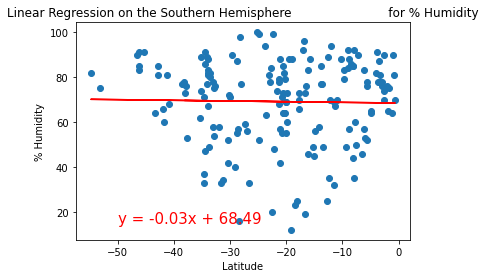

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

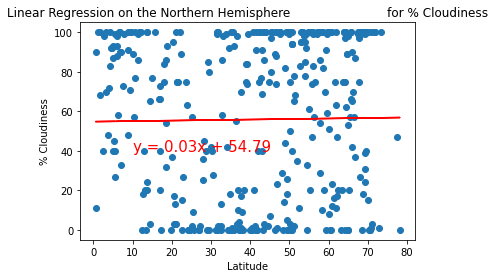

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

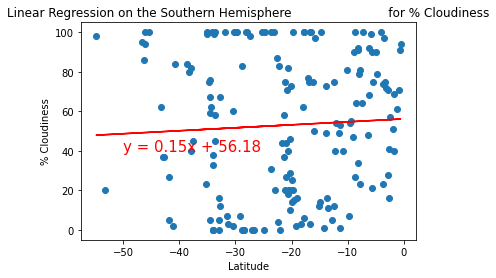

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,40))

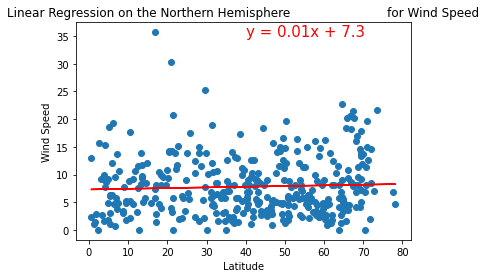

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))